In [2]:
#import neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#read in the data
NYT_US = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
NYT_counties = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
NYT_states = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
JH_data = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

#create dataframe
df = pd.read_csv(NYT_US, error_bad_lines=False)
df['time_since_Jan21'] = df.index

#scale down cases by 100k
POPULATION_NORMAL = 100000
df['cases'] /= POPULATION_NORMAL #cases = new cases
df.head()

In [ ]:
#creating the training and testing data sets 
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

#we use PolynomialFeatures function in Scikit-learn library
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

#training x and y's
train_x = np.asanyarray(train[['time_since_Jan21']])
train_y = np.asanyarray(train[['cases']])

#testing x and y's
test_x = np.asanyarray(test[['time_since_Jan21']])
test_y = np.asanyarray(test[['cases']])

#We specifiy the degree
poly = PolynomialFeatures(degree=2)
#fit_transform takes our x values, and outputs a multi dim. array of each x^0, x^1, x^2
train_x_poly = poly.fit_transform(train_x) 
# train_x_poly

#Each list now resembles the coeffecients from a mulitple linear regression, we use a linear regression!
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
# print ('Coefficients: ', clf.coef_)
# print ('Intercept: ',clf.intercept_)

##PLOT: Actual Data
plt.figure(figsize=(8,8))
plt.scatter(df['time_since_Jan21'],df['cases'],color='blue')
plt.title("Cases in the US")
plt.xlabel('Days since January 21st')
plt.ylabel('Cases per '+str(POPULATION_NORMAL))
plt.xticks(rotation=45)
##PLOT: Predicted Data
XX = np.arange(0.0, 200.0, 0.1) ##like linspace, it just creates a series of x coordinates
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )

In [ ]:
####EVALUATION -- can skip all the regressions and do the evaulation
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

In [ ]:
################################################################################################
################################################################################################
# Corona Visualizer by State
################################################################################################
################################################################################################

#create dataframe
df = pd.read_csv(NYT_states, error_bad_lines=False)

#Get state of interest and create df for state
myState = "Georgia"
state_df = df[df.state == myState]
INITIAL_DATE = state_df['date'].iloc[0] # not all states started recording on same date
state_df['days_since_'+INITIAL_DATE] = list(range(0, len(state_df)))

#scale down cases by 100k
POPULATION_NORMAL = 10000
state_df['cases'] /= POPULATION_NORMAL #cases = total cases

#show created df
state_df.head()

In [ ]:
#creating the training and testing data sets 
msk = np.random.rand(len(state_df)) < 0.8
train = state_df[msk]
test = state_df[~msk]

#we use PolynomialFeatures function in Scikit-learn library
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

#training x and y's
train_x = np.asanyarray(train[['days_since_'+INITIAL_DATE]])
train_y = np.asanyarray(train[['cases']])

#testing x and y's
test_x = np.asanyarray(test[['days_since_'+INITIAL_DATE]])
test_y = np.asanyarray(test[['cases']])

#We specifiy the degree
poly = PolynomialFeatures(degree=2)
#fit_transform takes our x values, and outputs a multi dim. array of each x^0, x^1, x^2
train_x_poly = poly.fit_transform(train_x) 
# train_x_poly

#Each list now resembles the coeffecients from a mulitple linear regression, we use a linear regression!
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
# print ('Coefficients: ', clf.coef_)
# print ('Intercept: ',clf.intercept_)

##PLOT: Actual Data
plt.figure(figsize=(8,8))
plt.scatter(state_df['days_since_'+INITIAL_DATE], state_df['cases'], color='blue')
plt.title("Cases in "+ myState)
plt.xlabel('Days since '+INITIAL_DATE)
plt.ylabel('Cases per '+str(POPULATION_NORMAL))
plt.xticks(rotation=45)
##PLOT: Predicted Data
extendedDomain = len(state_df)*1.25
XX = np.arange(0.0, extendedDomain, 0.1) ##like linspace, it just creates a series of x coordinates
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )

In [ ]:
####EVALUATION -- can skip all the regressions and do the evaulation
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

In [8]:
################################################################################################
################################################################################################
# Corona Visualizer by County
################################################################################################
################################################################################################

NYT_counties = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
#create dataframe
df = pd.read_csv(NYT_counties,error_bad_lines=False)
myState = "Georgia"
myCounty = "Muscogee"
state_df = df[df.state == myState]
county_df = state_df[state_df.county == myCounty]

INITIAL_DATE = county_df['date'].iloc[0] # not all states started recording on same date
county_df['days_since_'+INITIAL_DATE] = list(range(0, len(county_df)))

#scale down cases by 100k
POPULATION_NORMAL = 1000
county_df['cases'] /= POPULATION_NORMAL #cases = total cases
county_df.head()

C:\Users\fabri\miniconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\fabri\miniconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,county,state,fips,cases,deaths,days_since_2020-03-20
5369,2020-03-20,Muscogee,Georgia,13215.0,0.001,0,0
6303,2020-03-21,Muscogee,Georgia,13215.0,0.002,0,1
7349,2020-03-22,Muscogee,Georgia,13215.0,0.002,0,2
8501,2020-03-23,Muscogee,Georgia,13215.0,0.002,0,3
9759,2020-03-24,Muscogee,Georgia,13215.0,0.004,0,4


Mean absolute error: 0.09
Residual sum of squares (MSE): 0.01
R2-score: 0.95


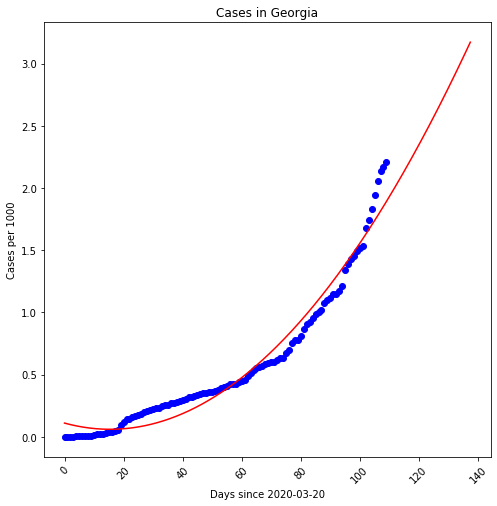

In [19]:
#creating the training and testing data sets 
msk = np.random.rand(len(county_df)) < 0.8
train = county_df[msk]
test = county_df[~msk]

#SPECIFY DEGREE
DEGREE = 2

#we use PolynomialFeatures function in Scikit-learn library
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

#training x and y's
train_x = np.asanyarray(train[['days_since_'+INITIAL_DATE]])
train_y = np.asanyarray(train[['cases']])

#testing x and y's
test_x = np.asanyarray(test[['days_since_'+INITIAL_DATE]])
test_y = np.asanyarray(test[['cases']])

#We specifiy the degree
poly = PolynomialFeatures(degree=DEGREE)
#fit_transform takes our x values, and outputs a multi dim. array of each x^0, x^1, x^2
train_x_poly = poly.fit_transform(train_x) 
# train_x_poly

#Each list now resembles the coeffecients from a mulitple linear regression, we use a linear regression!
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
# print ('Coefficients: ', clf.coef_)
# print ('Intercept: ',clf.intercept_)

##PLOT: Actual Data
plt.figure(figsize=(8,8))
plt.scatter(county_df['days_since_'+INITIAL_DATE], county_df['cases'], color='blue')
plt.title("Cases in "+ myState)
plt.xlabel('Days since '+INITIAL_DATE)
plt.ylabel('Cases per '+str(POPULATION_NORMAL))
plt.xticks(rotation=45)
##PLOT: Predicted Data
extendedDomain = len(county_df)*1.25
XX = np.arange(0.0, extendedDomain, 0.1) ##like linspace, it just creates a series of x coordinates
#GOES UP TO DEGREE SPECIFIED:
yy = clf.intercept_[0]
for n in range(DEGREE+1):
    yy+= clf.coef_[0][n]*np.power(XX,n)
# clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)+clf.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )

####EVALUATION -- can skip all the regressions and do the evaulation
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

In [198]:
################################################################################################
################################################################################################
# Corona Visualizer by County --> LOGISTIC REGRESSION
################################################################################################
################################################################################################

NYT_counties = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
#create dataframe
df = pd.read_csv(NYT_counties,error_bad_lines=False)
myState = "Connecticut"
myCounty = "Hartford"
state_df = df[df.state == myState]
county_df = state_df[state_df.county == myCounty]

INITIAL_DATE = county_df['date'].iloc[0] # not all states started recording on same date
county_df['days_since_'+INITIAL_DATE] = list(range(0, len(county_df)))

#scale down cases by 100k
POPULATION_NORMAL = 1000
county_df['cases'] /= POPULATION_NORMAL #cases = total cases
county_df.head()

C:\Users\fabri\miniconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\fabri\miniconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,county,state,fips,cases,deaths,days_since_2020-03-14
1992,2020-03-14,Hartford,Connecticut,9003.0,0.001,0,0
2374,2020-03-15,Hartford,Connecticut,9003.0,0.003,0,1
2809,2020-03-16,Hartford,Connecticut,9003.0,0.004,0,2
3291,2020-03-17,Hartford,Connecticut,9003.0,0.007,0,3
3846,2020-03-18,Hartford,Connecticut,9003.0,0.011,0,4


Mean absolute error: 0.60
Residual sum of squares (MSE): 0.60
R2-score: 0.96


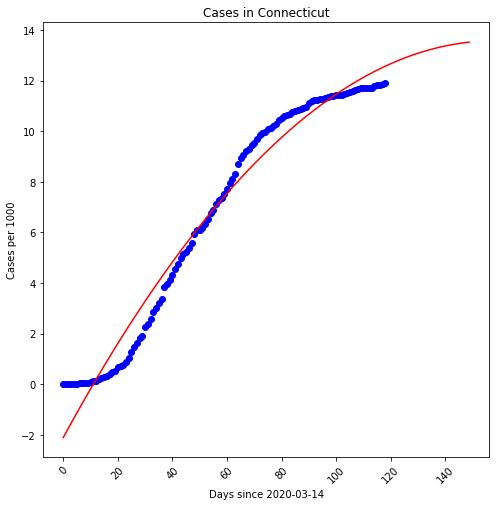

In [199]:
#####################POLY REGRESSION
#creating the training and testing data sets 
msk = np.random.rand(len(county_df)) < 0.8
train = county_df[msk]
test = county_df[~msk]

#SPECIFY DEGREE
DEGREE = 2

#we use PolynomialFeatures function in Scikit-learn library
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

#training x and y's
train_x = np.asanyarray(train[['days_since_'+INITIAL_DATE]])
train_y = np.asanyarray(train[['cases']])

#testing x and y's
test_x = np.asanyarray(test[['days_since_'+INITIAL_DATE]])
test_y = np.asanyarray(test[['cases']])

#We specifiy the degree
poly = PolynomialFeatures(degree=DEGREE)
#fit_transform takes our x values, and outputs a multi dim. array of each x^0, x^1, x^2
train_x_poly = poly.fit_transform(train_x) 
# train_x_poly

#Each list now resembles the coeffecients from a mulitple linear regression, we use a linear regression!
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
# print ('Coefficients: ', clf.coef_)
# print ('Intercept: ',clf.intercept_)

##PLOT: Actual Data
plt.figure(figsize=(8,8))
plt.scatter(county_df['days_since_'+INITIAL_DATE], county_df['cases'], color='blue')
plt.title("Cases in "+ myState)
plt.xlabel('Days since '+INITIAL_DATE)
plt.ylabel('Cases per '+str(POPULATION_NORMAL))
plt.xticks(rotation=45)
##PLOT: Predicted Data
extendedDomain = len(county_df)*1.25
XX = np.arange(0.0, extendedDomain, 0.1) ##like linspace, it just creates a series of x coordinates
#GOES UP TO DEGREE SPECIFIED:
yy = clf.intercept_[0]
for n in range(DEGREE+1):
    yy+= clf.coef_[0][n]*np.power(XX,n)
# clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)+clf.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )

####EVALUATION -- can skip all the regressions and do the evaulation
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

In [200]:
#################### LOGISTIC REGRESSION
import pandas as pd
import numpy as np
import scipy.optimize

def sigmoid(p,x):
    x0,y0,c,k=p
    y = c / (1 + np.exp(-k*(x-x0))) + y0
    return y

def residuals(p,x,y):
    return y - sigmoid(p,x)

def resize(arr,lower=0.0,upper=1.0):
    arr=arr.copy()
    if lower>upper: lower,upper=upper,lower
    arr -= arr.min()
    arr = np.multiply(arr,(upper-lower)/arr.max(),casting="unsafe")
    arr += lower
    return arr

In [215]:
from numpy import longdouble
           
msk = np.random.rand(len(county_df)) < 0.8
train = county_df[msk]
test = county_df[~msk]
#create train and test
x_train = np.array(train[['days_since_'+INITIAL_DATE]],dtype=longdouble).squeeze()
y_train = np.array(train[['cases']],dtype=longdouble).squeeze()
x_test = np.array(test[['days_since_'+INITIAL_DATE]],dtype=longdouble).squeeze()
y_test = np.array(test[['cases']],dtype=longdouble).squeeze()

# x_train=resize(x_train,lower=0.3)
# y_train=resize(y_train,lower=0.3)

In [216]:
x_train

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   9.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  24.,
        25.,  26.,  27.,  29.,  30.,  31.,  33.,  34.,  35.,  36.,  37.,
        39.,  41.,  42.,  43.,  44.,  45.,  47.,  48.,  49.,  50.,  51.,
        52.,  53.,  54.,  55.,  56.,  58.,  59.,  60.,  61.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98., 100.,
       102., 103., 104., 105., 106., 107., 108., 109., 110., 112., 113.,
       114., 115., 116., 117., 118.], dtype=float64)

In [209]:
p_guess=(np.median(x),np.median(y),1.0,1.0)
p, cov, infodict, mesg, ier = scipy.optimize.leastsq(residuals,p_guess,args=(x_train,y_train),full_output=1)  
x0,y0,c,k=p
print('''\
x0 = {x0}
y0 = {y0}
c = {c}
k = {k}
'''.format(x0=x0,y0=y0,c=c,k=k))

x0 = 61.37210092575859
y0 = 10.84413953595455
c = -7.770408766035034
k = -916.103394974083



C:\Users\fabri\miniconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


C:\Users\fabri\miniconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


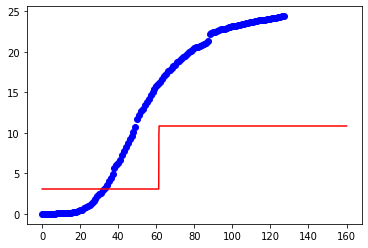

In [204]:
XX = np.linspace(0, 160, 1500)
YY = sigmoid(p,XX)
plt.plot(x, y, 'bo', XX, YY, '-r')
plt.show()

In [205]:
##Evaluation
y_model = sigmoid(p,x_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_model - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_model - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_model, y_test) )

Mean absolute error: 1.50
Residual sum of squares (MSE): 3.30
R2-score: 0.78


C:\Users\fabri\miniconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


In [206]:
y_model

array([ 3.07373077,  3.07373077,  3.07373077,  3.07373077,  3.07373077,
        3.07373077,  3.07373077,  3.07373077,  3.07373077,  3.07373077,
       10.84413954, 10.84413954, 10.84413954, 10.84413954, 10.84413954,
       10.84413954, 10.84413954, 10.84413954, 10.84413954, 10.84413954,
       10.84413954, 10.84413954, 10.84413954, 10.84413954])

In [207]:
y_test

array([3.0000e-03, 5.4000e-02, 6.1000e-02, 1.8900e-01, 7.2600e-01,
       2.3700e+00, 3.3510e+00, 4.5700e+00, 5.3880e+00, 5.9310e+00,
       8.1260e+00, 8.9570e+00, 9.0500e+00, 9.2990e+00, 9.9620e+00,
       1.0207e+01, 1.0844e+01, 1.0924e+01, 1.1261e+01, 1.1322e+01,
       1.1414e+01, 1.1728e+01, 1.1866e+01, 1.1892e+01])